<a href="https://colab.research.google.com/github/sandeeps2004/JPM-QuantResearch-Virtual-Task-3/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')

In [3]:
df = df.drop('customer_id', axis=1)

In [4]:
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [5]:
# Calculate ratios
df["payment_to_income"] = df["loan_amt_outstanding"] / df["income"]
df["debt_to_income"] = df["total_debt_outstanding"] / df["income"]

# Define features and target
features = [
    "credit_lines_outstanding",
    "debt_to_income",
    "payment_to_income",
    "years_employed",
    "fico_score"
]
target = "default"

X = df[features]
y = df[target]

In [6]:
clf = LogisticRegression(
    random_state=0,
    solver="liblinear",
    tol=1e-5,
    max_iter=10000
).fit(X, y)

print("\nModel Coefficients:", clf.coef_)
print("Model Intercept:", clf.intercept_)


Model Coefficients: [[ 8.18520373  0.54490854  0.01994244 -2.77630853 -0.02418391]]
Model Intercept: [-0.09162643]


In [9]:
y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
auc_value = metrics.auc(fpr, tpr)
error_rate = np.mean(np.abs(y - y_pred))

In [10]:
print("\nModel Performance:")
print(f"Error Rate: {error_rate:.4f}")
print(f"AUC Score: {auc_value:.4f}")


Model Performance:
Error Rate: 0.0037
AUC Score: 0.9999


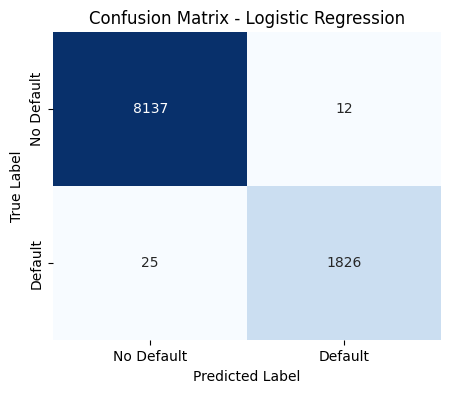

In [16]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [12]:
# Define Prediction Function
RECOVERY_RATE = 0.10  # 10% recovery → 90% loss given default

def predict_expected_loss(input_data):
    """
    Estimate Probability of Default (PD) and Expected Loss (EL)
    using trained logistic regression model.

    Parameters:
    input_data (dict): Borrower data

    Returns:
    dict: PD and Expected Loss
    """
    df_input = pd.DataFrame([input_data])
    df_input["payment_to_income"] = df_input["loan_amt_outstanding"] / df_input["income"]
    df_input["debt_to_income"] = df_input["total_debt_outstanding"] / df_input["income"]

    X_input = df_input[features]
    pd_value = clf.predict_proba(X_input)[0, 1]
    loan_amt = df_input["loan_amt_outstanding"].values[0]
    expected_loss = pd_value * loan_amt * (1 - RECOVERY_RATE)

    return {"PD": pd_value, "Expected_Loss": expected_loss}

In [14]:
example_1 = {
    "credit_lines_outstanding": 4,
    "loan_amt_outstanding": 25000,
    "total_debt_outstanding": 85000,
    "income": 70000,
    "years_employed": 6,
    "fico_score": 710
}


print("\n=== Example 1 ===")
res1 = predict_expected_loss(example_1)
print(f"Probability of Default: {res1['PD']:.2%}")
print(f"Expected Loss: ${res1['Expected_Loss']:,.2f}")


=== Example 1 ===
Probability of Default: 37.51%
Expected Loss: $8,439.54


In [15]:
example_2 = {
    "credit_lines_outstanding": 7,
    "loan_amt_outstanding": 40000,
    "total_debt_outstanding": 120000,
    "income": 55000,
    "years_employed": 3,
    "fico_score": 620
}

print("\n=== Example 2 ===")
res2 = predict_expected_loss(example_2)
print(f"Probability of Default: {res2['PD']:.2%}")
print(f"Expected Loss: ${res2['Expected_Loss']:,.2f}")


=== Example 2 ===
Probability of Default: 100.00%
Expected Loss: $36,000.00
